In [ ]:
# Se importan las librerías que corresponden
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Se leen los datos
df_heart = pd.read_csv('https://raw.githubusercontent.com/JhonBS17/machineLearningFiles/main/heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


A continuación, se presenta el significado de cada columna del dataset:
* age
* sex
* cp - Tipo de dolor de pecho (4 valores desde 0 hasta 3)
* trestbps - Presión arterial en reposo
* chol - Colesterol sérico en mg/dl
* fbs - Azucar en la sangre en ayunas > 120 mg/dl
* restecg - Resultados electrocardiográficos en reposo (valores de 0,1,2)
* thalach - Frecuencia cardíaca máxima alcanzada
* exang - Angina inducida por ejercicio
* oldpeak - Depresión inducida por el ejercicio en relación con el reposo
* slope - 
* ca - Número de vasos principales (0-3) coloreados por la floración
* thal - 0 = normal; 1 = defecto fijo; 2 = defecto reversible
* target - Infarto: sí = 1; no = 0



#**1. Exploración Inicial**

In [ ]:
# Obtener el número de registros y features del dataset
df_heart.shape

(1025, 14)

In [ ]:
# Obtener información acerca del dataset
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Generar estadísticas del dataset
df_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


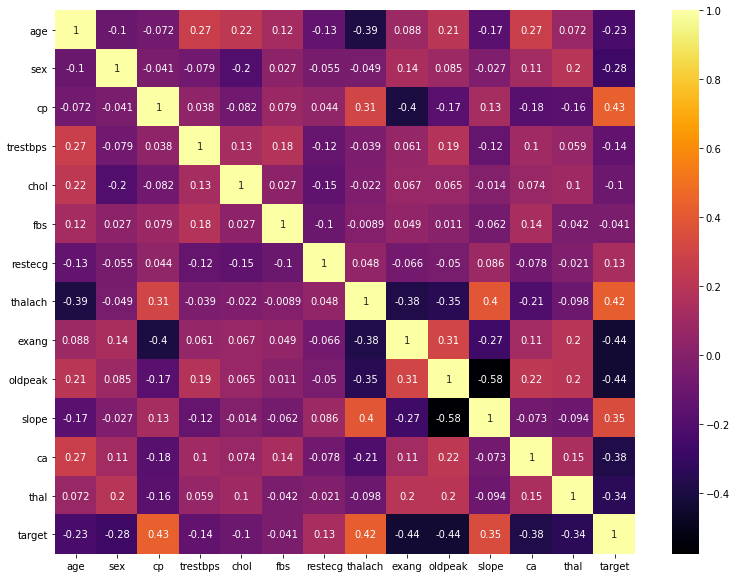

In [ ]:
# Obtener la correlación entre las variables del dataset
plt.figure(figsize=(13,10))
sns.heatmap(df_heart.corr(), annot=True, cmap='inferno')
plt.show()

#**2. Separación en entrenamiento y test**

In [ ]:
# Se escogen las variables con las que se van a trabajar, teniendo en cuenta las correlaciones halladas anteriormente
columns_df = ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'target']
df_heart_final = df_heart[columns_df]

In [ ]:
# Se divide el dataset en training y test
training, test = train_test_split(df_heart_final, test_size=0.3)

#**3.Preprocesamiento**

In [ ]:
# Usar un pipeline para generar el modelo que se desea
pipe = Pipeline([('clean', SimpleImputer(strategy='most_frequent')), ('scaler', StandardScaler())])

In [ ]:
# Agrupar todos los datos al aplicar el pipeline en el DataFrame de training, a excepción de la variable 'target'
ct = ColumnTransformer([('pipe', pipe, [0, 1, 2, 3, 4, 5])], remainder='passthrough')
training_data = ct.fit_transform(training)

In [ ]:
# Se crea el nuevo dataframe de training con los datos procesados
new_training = pd.DataFrame(training_data, columns=columns_df)
new_training.head()

,cp,thalach,exang,oldpeak,slope,ca,target
0,1.053125,0.238695,1.354250,-0.926241,0.999721,0.250913,1.0
1,0.078815,-0.707092,-0.738416,-0.926241,-0.600279,-0.737573,1.0
2,1.053125,0.496637,-0.738416,0.433257,-0.600279,-0.737573,1.0
3,2.027436,-0.191208,1.354250,0.603195,-0.600279,-0.737573,1.0
4,1.053125,1.012522,-0.738416,-0.926241,0.999721,-0.737573,1.0


In [ ]:
# Se dividen estos datos de entrenamiento en trainig y validation
X = new_training[columns_df[:6]]
y = new_training['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

# **4. Selección y extracción de características**

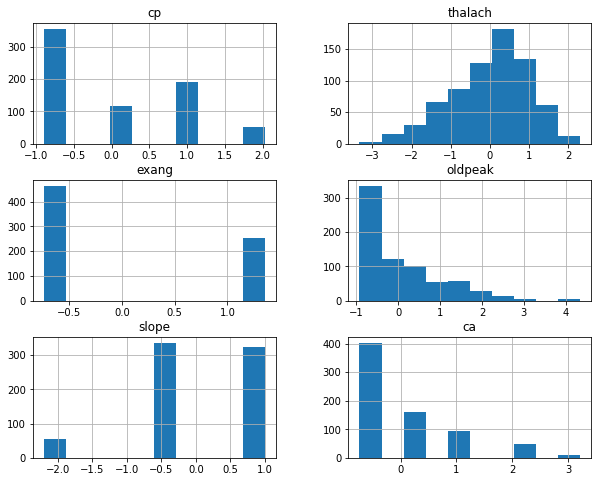

In [ ]:
# Verificar la distribución de los datos mediante histogramas
X.hist(figsize=(10,8))
plt.show()

Inicialmente, se realizan histogramas para poder obsevar de mejor forma la distribucion de los datos en las variables escogidas. En algunas variables como 'exang' y 'ca' se puede ver una tendencia hacia cierto valores.

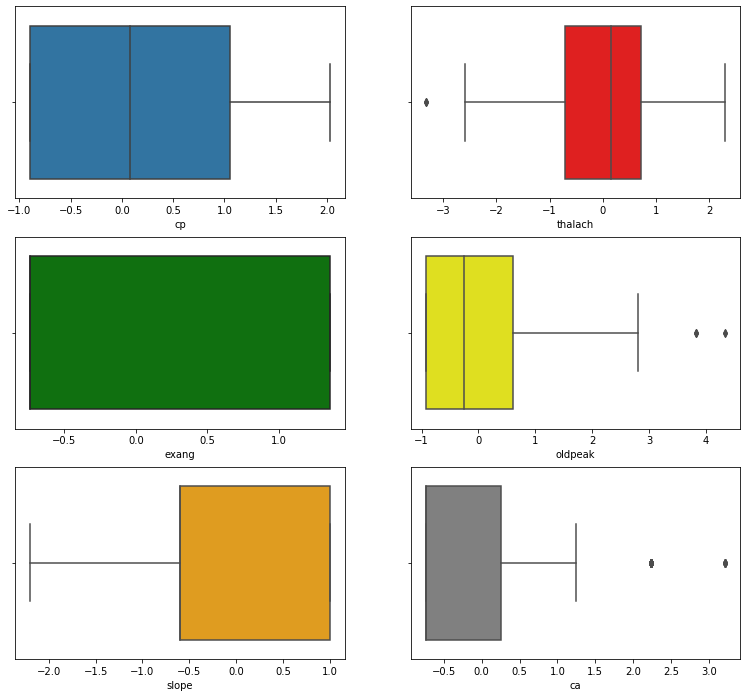

In [ ]:
# Obtener los principales datos estadísiticos de cada variable mediante el diagrama boxplot
plt.figure(figsize=(13,12))
plt.subplot(3,2,1)
sns.boxplot(x=X['cp'])
plt.subplot(3,2,2)
sns.boxplot(x=X['thalach'], color='red')
plt.subplot(3,2,3)
sns.boxplot(x=X['exang'], color='green')
plt.subplot(3,2,4)
sns.boxplot(x=X['oldpeak'], color='yellow')
plt.subplot(3,2,5)
sns.boxplot(x=X['slope'], color='orange')
plt.subplot(3,2,6)
sns.boxplot(x=X['ca'], color='grey')
plt.show()

El diagrama de cajas y bigotes nos muestra algunos datos estadísticos relevantes, en donde se puede resaltar la escasez de datos extraordinarios o alejados del promedio en casi todas las variables, lo cual es un aspecto positivo al momento de elegir dichas variables.

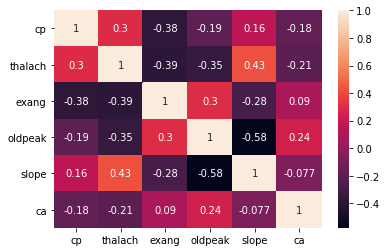

In [ ]:
# Obtener la correlación entre las variables del dataset de training
sns.heatmap(X.corr(), annot=True)
plt.show()

Por último se puede apreciar una correlación entre variables como se había presentado anteriormente con todo el dataset. Esta gráfica comprueba que las variables escogidas representan las correlaciones más altas encontradas y que pueden aportar al rendimiento de los modelos a realizar.

#**5. Evaluación de modelos**

**Decision Tree**

In [ ]:
clf_DT = DecisionTreeClassifier()

In [ ]:
# Se utilizan algunas métricas para evaluar el modelo)
accuracy = np.around(cross_val_score(clf_DT, X, y, cv=5), decimals=3)
recall = np.around(cross_val_score(clf_DT, X, y, cv=5, scoring='recall'), decimals=3)
f1 = np.around(cross_val_score(clf_DT, X, y, cv=5, scoring='f1'), decimals=3)

print(f'''Decision Tree Metrics\n
Accuracy:
array: {accuracy.tolist()}
mean: {round(np.mean(accuracy), 3)}
std: {round(np.std(accuracy), 3)}\n
Recall:
array: {recall.tolist()}
mean: {round(np.mean(recall), 3)}
std: {round(np.std(recall), 3)}\n
f1-score:
array: {f1.tolist()}
mean: {round(np.mean(f1), 3)}
std: {round(np.std(f1), 3)}''')

Decision Tree Metrics

Accuracy:
array: [0.917, 0.951, 0.923, 0.972, 0.986]
mean: 0.95
std: 0.027

Recall:
array: [0.918, 0.959, 0.945, 0.959, 1.0]
mean: 0.956
std: 0.027

f1-score:
array: [0.924, 0.952, 0.926, 0.966, 0.993]
mean: 0.952
std: 0.026


In [ ]:
# Se entrena el clasificador
clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Se realiza la prediccion de validación
y_predict = clf_DT.predict(X_val)
recall_score(y_val, y_predict)

0.8938053097345132

In [ ]:
# Se comparan los valores de y_val y y_predict
values = pd.DataFrame({'Actual': y_val, 'Predicted': y_predict})
values.head(8)

,Actual,Predicted
321,0.0,0.0
435,1.0,0.0
577,1.0,1.0
543,1.0,1.0
482,0.0,0.0
622,0.0,0.0
437,0.0,0.0
68,0.0,0.0


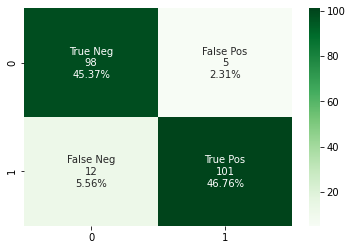

In [ ]:
# Se implementa la matriz de confusión
cf_matrix = confusion_matrix(y_val, y_predict)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')
plt.show()

**K-Nearest Neighbors**

In [ ]:
param_grid = [{'n_neighbors': [1, 5, 10, 20]}]

In [ ]:
# Se realiza el ajuste de hiperparámetros
clf_KNN = KNeighborsClassifier()
gs = GridSearchCV(clf_KNN, param_grid)

In [ ]:
gs.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 5, 10, 20]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Se consulta el mejor valor para el parámetro 'n_neighbors'
gs.best_params_

{'n_neighbors': 1}

In [ ]:
clf_KNN = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Se utilizan algunas métricas para evaluar el modelo)
accuracy = np.around(cross_val_score(clf_KNN, X, y, cv=5), decimals=3)
recall = np.around(cross_val_score(clf_KNN, X, y, cv=5, scoring='recall'), decimals=3)
f1 = np.around(cross_val_score(clf_KNN, X, y, cv=5, scoring='f1'), decimals=3)

print(f'''K-Neirest Neighbors Metrics\n
Accuracy:
array: {accuracy.tolist()}
mean: {round(np.mean(accuracy), 3)}
std: {round(np.std(accuracy), 3)}\n
Recall:
array: {recall.tolist()}
mean: {round(np.mean(recall), 3)}
std: {round(np.std(recall), 3)}\n
f1-score:
array: {f1.tolist()}
mean: {round(np.mean(f1), 3)}
std: {round(np.std(f1), 3)}''')

Decision Tree Metrics

Accuracy:
array: [0.91, 0.944, 0.93, 0.986, 0.972]
mean: 0.948
std: 0.028

Recall:
array: [0.945, 0.945, 0.945, 1.0, 1.0]
mean: 0.967
std: 0.027

f1-score:
array: [0.914, 0.945, 0.932, 0.986, 0.973]
mean: 0.95
std: 0.026


In [ ]:
# Se entrena el clasificador
clf_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# Se realiza la prediccion de validación
y_predict = clf_KNN.predict(X_val)
recall_score(y_val, y_predict)

0.8938053097345132

In [ ]:
# Se comparan los valores de y_val y y_predict
values = pd.DataFrame({'Actual': y_val, 'Predicted': y_predict})
values.head(8)

,Actual,Predicted
321,0.0,0.0
435,1.0,1.0
577,1.0,0.0
543,1.0,1.0
482,0.0,0.0
622,0.0,0.0
437,0.0,0.0
68,0.0,0.0


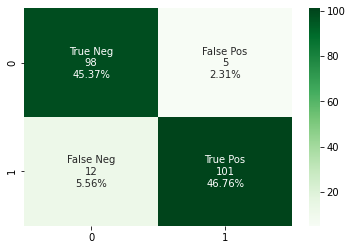

In [ ]:
# Se implementa la matriz de confusión
cf_matrix = confusion_matrix(y_val, y_predict)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')
plt.show()

**Logistic Regression**

In [ ]:
clf_LR = LogisticRegression()

In [ ]:
# Se utilizan algunas métricas para evaluar el modelo)
accuracy = np.around(cross_val_score(clf_LR, X, y, cv=5), decimals=3)
recall = np.around(cross_val_score(clf_LR, X, y, cv=5, scoring='recall'), decimals=3)
f1 = np.around(cross_val_score(clf_LR, X, y, cv=5, scoring='f1'), decimals=3)

print(f'''Logistic Regression Metrics\n
Accuracy:
array: {accuracy.tolist()}
mean: {round(np.mean(accuracy), 3)}
std: {round(np.std(accuracy), 3)}\n
Recall:
array: {recall.tolist()}
mean: {round(np.mean(recall), 3)}
std: {round(np.std(recall), 3)}\n
f1-score:
array: {f1.tolist()}
mean: {round(np.mean(f1), 3)}
std: {round(np.std(f1), 3)}''')

Decision Tree Metrics

Accuracy:
array: [0.812, 0.84, 0.783, 0.853, 0.811]
mean: 0.82
std: 0.025

Recall:
array: [0.89, 0.877, 0.795, 0.932, 0.808]
mean: 0.86
std: 0.052

f1-score:
array: [0.828, 0.848, 0.789, 0.866, 0.814]
mean: 0.829
std: 0.027


In [ ]:
# Se entrena el clasificador
clf_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Se realiza la prediccion de validación
y_predict = clf_LR.predict(X_val)
recall_score(y_val, y_predict)

0.8761061946902655

In [ ]:
# Se comparan los valores de y_val y y_predict
values = pd.DataFrame({'Actual': y_val, 'Predicted': y_predict})
values.head(8)

,Actual,Predicted
321,0.0,0.0
435,1.0,1.0
577,1.0,1.0
543,1.0,1.0
482,0.0,0.0
622,0.0,1.0
437,0.0,0.0
68,0.0,0.0


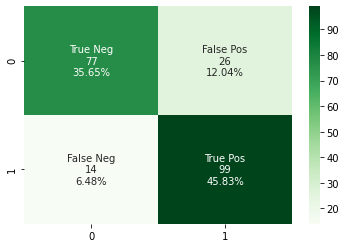

In [ ]:
# Se implementa la matriz de confusión
cf_matrix = confusion_matrix(y_val, y_predict)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')
plt.show()

#**6. Evaluación final sobre dataset de test**

In [ ]:
# Usar un pipeline para estandarizar el dataframe de test
pipe = Pipeline([('scaler', StandardScaler())])

In [ ]:
# Agrupar todos los datos al aplicar el pipeline en el DataFrame de test, a excepción de la variable 'target'
ct = ColumnTransformer([('pipe', pipe, [0, 1, 2, 3, 4, 5])], remainder='passthrough')
test_data = ct.fit_transform(test)

In [ ]:
# Se crea el nuevo dataframe de test con los datos procesados
new_test = pd.DataFrame(test_data, columns=columns_df)
new_test.head()

,cp,thalach,exang,oldpeak,slope,ca,target
0,-0.964422,-0.029867,1.532262,-0.880596,0.986743,1.144614,0.0
1,0.003141,0.957359,-0.652630,-0.880596,0.986743,-0.720683,1.0
2,-0.964422,-0.837598,1.532262,0.660934,0.986743,2.077262,0.0
3,-0.964422,0.463746,-0.652630,-0.452394,-0.683130,-0.720683,1.0
4,0.970705,0.957359,1.532262,-0.880596,0.986743,-0.720683,1.0


In [ ]:
# Se divide el dataset de test en X_test y y_test
X_test = new_test[columns_df[:6]]
y_test = new_test['target']

In [ ]:
def clasificar(clf, X, umbral):
  
  """Función que determina si para un conjunto de muestras,
      cada muestra pertenece o no a la clase

  Args:
      clf: clasificador entrenado
      X: matriz de variables de entrada
      umbral: valor a tener en cuenta para determinar si una muestra es 
      de la clase 1 o no
      basado en las probabilidades retornadas por el clasificador.
  Returns:
      y: Devuelve un arreglo correspondiente a las clases encontradas para cada 
      una de las muestras

  """
  y_pred_proba = clf.predict_proba(X)
  return [0 if x[0] > umbral else 1 for x in y_pred_proba]


**Decision Tree**

In [ ]:
# Se realiza la predicción de y_test para evaluar el modelo mediant las métricas correspondientes
y_pred = clf_DT.predict(X_test)
print(f'''Accuracy: {accuracy_score(y_test, y_pred)}
Recall: {recall_score(y_test, y_pred)}
f1-score: {f1_score(y_test, y_pred)}''')

Accuracy: 0.8441558441558441
Recall: 0.8633540372670807
f1-score: 0.852760736196319


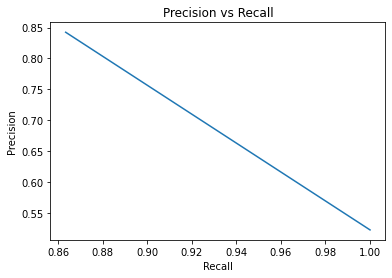

In [ ]:
# Se crea la curva Precision vs Recall
i = []; j = []

for k in range(1, 11):
  clasif = clasificar(clf_DT, X_test, k*0.1)
  i.append(recall_score(y_test, clasif))
  j.append(precision_score(y_test, clasif))

plt.plot(i, j)
plt.title('Precision vs Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

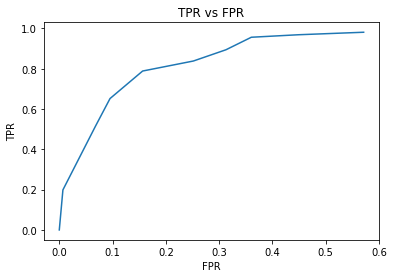

In [ ]:
# Se crea la curva ROC (TPR vs FPR)
TPR = []
FPR = []

for k in range(0, 10):
  clasif = clasificar(clf_LR, X_test, k*0.1)
  TPR.append(recall_score(y_test, clasif))
  FPR.append(1 - recall_score(np.logical_not(y_test), np.logical_not(clasif)))

plt.plot(FPR, TPR)
plt.title('TPR vs FPR')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

**K-Nearest Neighbors**

In [ ]:
# Se realiza la predicción de y_test para evaluar el modelo mediant las métricas correspondientes
y_pred = clf_KNN.predict(X_test)
print(f'''Accuracy: {accuracy_score(y_test, y_pred)}
Recall: {recall_score(y_test, y_pred)}
f1-score: {f1_score(y_test, y_pred)}''')

Accuracy: 0.948051948051948
Recall: 0.9503105590062112
f1-score: 0.9503105590062112


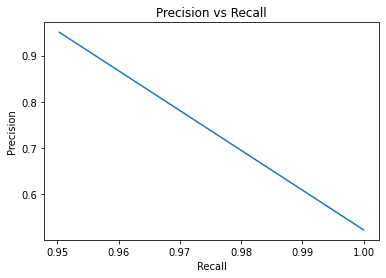

In [ ]:
# Se crea la curva Precision vs Recall
i = []; j = []

for k in range(1, 11):
  clasif = clasificar(clf_KNN, X_test, k*0.1)
  i.append(recall_score(y_test, clasif))
  j.append(precision_score(y_test, clasif))

plt.plot(i, j)
plt.title('Precision vs Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

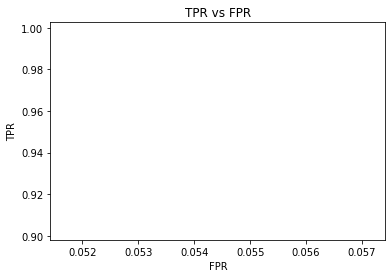

In [ ]:
# Se crea la curva ROC (TPR vs FPR)
TPR = []
FPR = []

for k in range(0, 10):
  clasif = clasificar(clf_KNN, X_test, k*0.1)
  TPR.append(recall_score(y_test, clasif))
  FPR.append(1 - recall_score(np.logical_not(y_test), np.logical_not(clasif)))

plt.plot(FPR, TPR)
plt.title('TPR vs FPR')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

**Logistic Regression**

In [ ]:
# Se realiza la predicción de y_test para evaluar el modelo mediant las métricas correspondientes
y_pred = clf_LR.predict(X_test)
print(f'''Accuracy: {accuracy_score(y_test, y_pred)}
Recall: {recall_score(y_test, y_pred)}
f1-score: {f1_score(y_test, y_pred)}''')

Accuracy: 0.7954545454545454
Recall: 0.8385093167701864
f1-score: 0.8108108108108109


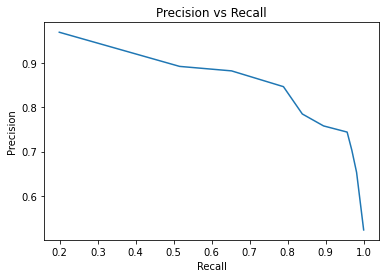

In [ ]:
# Se crea la curva Precision vs Recall
i = []; j = []

for k in range(1, 11):
  clasif = clasificar(clf_LR, X_test, k*0.1)
  i.append(recall_score(y_test, clasif))
  j.append(precision_score(y_test, clasif))

plt.plot(i, j)
plt.title('Precision vs Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

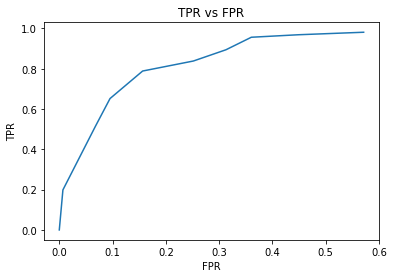

In [ ]:
# Se crea la curva ROC (TPR vs FPR)
TPR = []
FPR = []

for k in range(0, 10):
  clasif = clasificar(clf_LR, X_test, k*0.1)
  TPR.append(recall_score(y_test, clasif))
  FPR.append(1 - recall_score(np.logical_not(y_test), np.logical_not(clasif)))

plt.plot(FPR, TPR)
plt.title('TPR vs FPR')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

##**Análisis Final**

* Teniendo en cuenta los algoritmos implementados, se puede concluir que al utilizar **Decision Tree** hubo un mayor rendimiento o resultados al realizar el entrenamiento del modelo, aunque es muy cercano al de **KNN**. Por otro lado, con la implementación del algoritmo **KNN** se logró un rendimiento más alto en la etapa de test con respecto a los demás algoritmos.

* Al usar el algoritmo **Logistic Regression** se obtuvieron los datos más bajos, sin embargo superan el 80% por lo que se puede considerar como un buen modelo.

* Con las variables escogidas se obtuvo el mayor rendimiento posible, esto debido a los valores de correlación que, aunque no sean tan altos en general, son los más altos en este dataset.

* Al realizar la evaluación final sobre el dataset de test, las gráficas de curvas **ROC** y **Precision vs Recall** halladas para cada algoritmo presentan una tendencia ideal con respecto a los valores esperados, esto debido a los altos rendimientos en cada modelo como ya se ha mencionado anteriormente.